# Name : Jung-Hyun Lee
# Student ID : 2018120206
# link : https://github.com/JungHyun-L/DataMining

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# define least square approximation function: $ \hat{x}=(A^{\rm T}A)^{-1}A^{\rm T}b$

In [2]:
def leastsquareApprox(xMat,yMat) :
    xTx= np.dot(xMat.T,xMat)
    middle=np.dot(np.linalg.inv(xTx),xMat.T)
    ws=np.dot(middle,yMat)
    return (ws)

# random vector의 갯수를 입력하면 그것을 행렬로 만들어서 반환하는 함수

In [3]:
def randMat(num) :
    R=[]
    
    for i in range(num):
        r = np.random.normal(0, 1, 784)
        R.append(r)
    
    R=np.array(R)
    R_T=R.T
    return (R_T)
    

# $\tilde{f}$ function: Kth 분류기의 $\tilde{f}$ 값을 리스트로 반환한다

In [4]:
def f_tilde(list_label_train,list_image_test,R,A,k):
    # 이제 모델 파라미터 훈련을 시키자!

    # 우선 최종적인 라벨 생성

    #label 만들기
    list_label_train=list_label_train.reshape(60000,1)

    #0이면 1로 아니면 -1로 바꾸기
    list_label_train[list_label_train!=k]=-1
    list_label_train[list_label_train==k]=1

    # 훈련시키기
    ws=leastsquareApprox(A,list_label_train)
    
    # 이제 testset에 적용하여 보자

    # 1. random vector 만든것 test에도 적용하기
    list_image_test_T=list_image_test.T

    A_test=np.matmul(list_image_test_T,R)
    
    # yHat은 추정치
    yHat=np.dot(A_test,ws)
    
    return yHat


# mnist dataset

In [5]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images



# normalize, distance function

In [6]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

In [7]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1


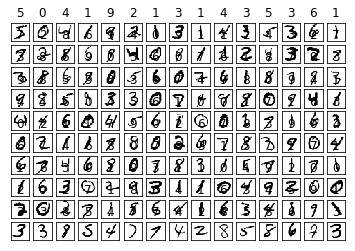

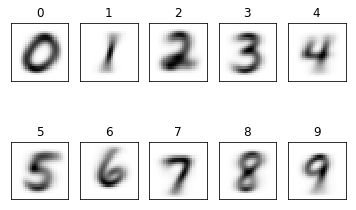

In [8]:
# 
# plot first 150 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [9]:
# random vector feature 갯수를 128개로 하자
R=randMat(128)

In [10]:
 #이제 train matrix 잘정리해서 r 과 곱하여 A를 만들자

list_image_train.shape

list_image_train_T=list_image_train.T

A=np.matmul(list_image_train_T,R)

In [11]:
# classifier를 10개 만들어서 그중 f tilde가 가장 큰 것으로 labeling 한다

# 우선 label은 모두 -1로 초기화
label=[-1]*10000
# f tilde는 모두 -9로 초기화
ft=[-9]*10000

for i in range(10):
    ith_classifier= f_tilde(list_label_train.copy(),list_image_test.copy(),R,A,i)
    for k in range(10000):
        if ith_classifier[k][0]> ft[k]:
            ft[k]=ith_classifier[k][0]
            label[k]=i
    



# confusion matrix

In [12]:
confusion_matrix(list_label_test,label)

array([[ 933,    1,    4,    4,    1,    8,   18,    1,   10,    0],
       [   0, 1103,    2,    2,    1,    1,    4,    2,   20,    0],
       [  21,   53,  809,   28,   12,    0,   30,   28,   44,    7],
       [   8,   23,   25,  869,    3,   14,    9,   28,   19,   12],
       [   2,   27,    7,    2,  865,    2,   13,    1,   13,   50],
       [  27,   23,   12,   93,   20,  562,   29,   19,   78,   29],
       [  16,    9,    8,    1,   17,   16,  884,    0,    7,    0],
       [   7,   44,   24,    9,   11,    1,    2,  884,    2,   44],
       [  11,   63,   12,   47,   20,   30,   23,   22,  722,   24],
       [  19,   14,    8,   16,   71,    6,    4,   64,    8,  799]],
      dtype=int64)

# F1 score

In [13]:
f1_score(list_label_test,label, average='micro')

0.843